In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [2]:
import tensorflow 
from tensorflow import keras

2024-07-07 00:42:27.632315: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 00:42:27.632438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 00:42:27.783779: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(f'Train images shape: {X_train.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test images shape: {X_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [5]:
X_train = X_train.reshape(X_train.shape[0], -1).flatten()
y_train = y_train.reshape(y_train.shape[0], -1).flatten()
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

In [6]:
print(f'Train images shape: {X_train.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test images shape: {X_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Train images shape: (47040000,)
Train labels shape: (60000,)
Test images shape: (10000, 784)
Test labels shape: (10000, 1)


In [7]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:

y_train = (y_train == '5')# True for all 5s, False for all other digits
y_test = (y_test == '5')

In [9]:
from sklearn.linear_model import SGDClassifier

# Create an SGDClassifier instance
sgd_clf = SGDClassifier(random_state=42)

In [10]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [12]:
sgd_clf.predict([X_test[5]])

array([False])

In [13]:
import numpy as np
from sklearn.dummy import DummyClassifier



# Create a dummy classifier with the "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Make predictions
predictions = dummy_clf.predict(X_test)

# Evaluate the model (accuracy score)
accuracy = dummy_clf.score(X_test, y_test)

print("Predictions:", predictions)
print("Accuracy:", accuracy)


Predictions: [False False False ... False False False]
Accuracy: 0.9108


In [14]:
cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

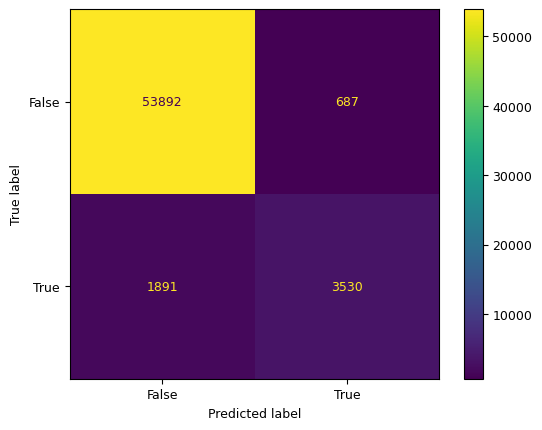

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [18]:
y_train_perfect_predictions = y_train  # pretend we reached perfection
confusion_matrix(y_train, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred, average='micro') 

0.9570333333333333

In [20]:
recall_score(y_train, y_train_pred, average='micro') 

0.9570333333333333

In [21]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average='micro')

0.9570333333333333

In [22]:
y_scores = sgd_clf.decision_function([X_test[0]])
y_scores

array([-8542.1753957])

In [23]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [24]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

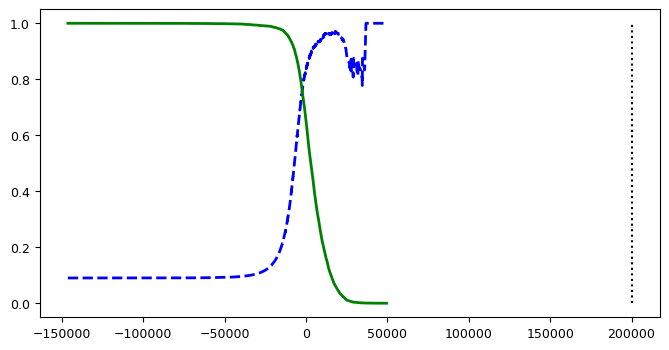

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

In [27]:
idx_for_90_precision = (y_train_pred >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train, y_train_pred_90)
recall_at_90_precision = recall_score(y_train, y_train_pred_90)
recall_at_90_precision

1.0

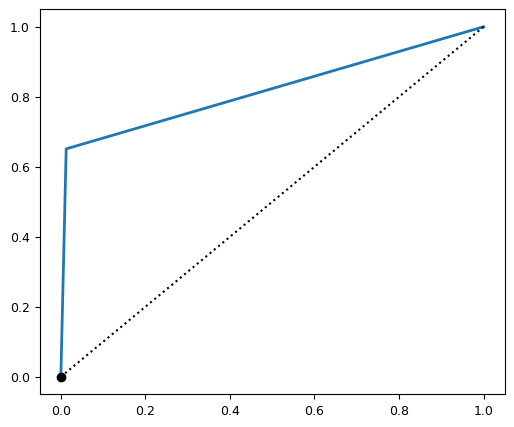

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9604938554008616

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")
y_probas_forest[:2]


array([[0.11, 0.89],
       [0.99, 0.01]])

In [31]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train, y_scores_forest)

In [32]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train, y_train_pred_forest)


0.9274509803921569

In [33]:
roc_auc_score(y_train, y_scores_forest)


0.9983436731328145

In [34]:
precision_score(y_train, y_train_pred_forest)

0.9897468089558485

In [35]:
recall_score(y_train, y_train_pred_forest)

0.8725327430363402